In [142]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

# Упражнение 4.1

На сайте Soft Murmur можно послушать множество природных источников шума, включая дождь, волны, ветер и др. На веб-странице http://asoftmurmur.com/about/ приведен перечень записей; большинство из них хранится на http://freesound.org.

Скачайте некоторые из этих файлов и вычислите спектры каждого сигнала. Похож ли их спектр мощности на белый, розовый или броуновский шум? Как спектр меняется во времени?

In [143]:
from thinkdsp import read_wave

if not os.path.exists('rain.wav'):
    !wget https://github.com/Ch0rtik/telecom/raw/main/chap_04/rain.wav

rain_segment = read_wave('rain.wav').segment(start=1.0, duration=10.0)
rain_segment.make_audio()

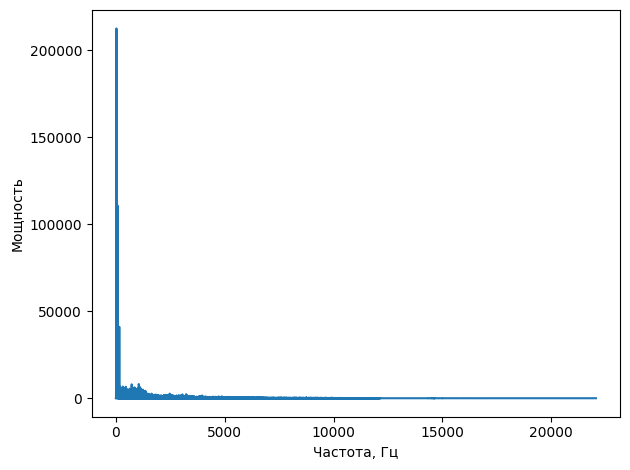

In [144]:
from thinkdsp import decorate

rain_spectrum = rain_segment.make_spectrum()
rain_spectrum.plot_power()
decorate(xlabel='Частота, Гц', ylabel='Мощность')

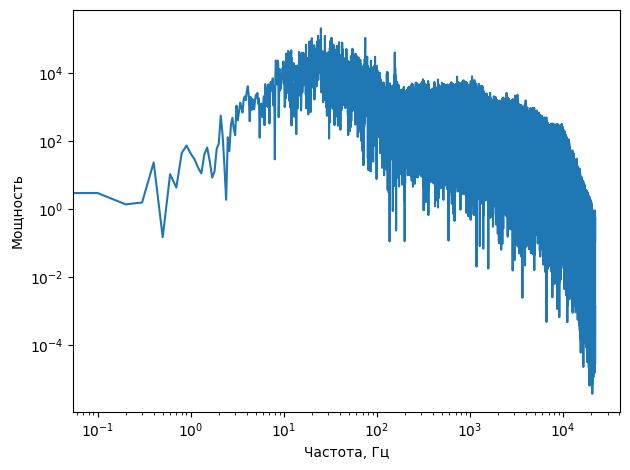

In [145]:
rain_spectrum.plot_power()
decorate(xlabel='Частота, Гц', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [146]:
rain_spectrum.estimate_slope().slope

-2.396758311278308

Коэффициент близок к -2 – красный шум

In [147]:
if not os.path.exists('sea.wav'):
    !wget https://github.com/Ch0rtik/telecom/raw/main/chap_04/sea.wav

sea_segment = read_wave('sea.wav').segment(start=1.0, duration=4.0)
sea_segment.make_audio()

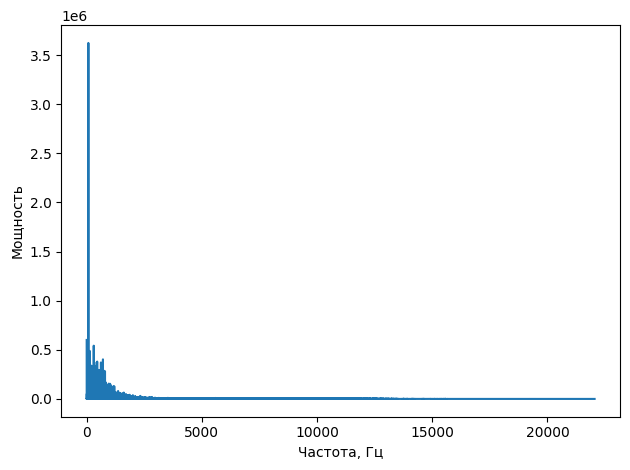

In [148]:
sea_spectrum = sea_segment.make_spectrum()
sea_spectrum.plot_power()
decorate(xlabel='Частота, Гц', ylabel='Мощность')

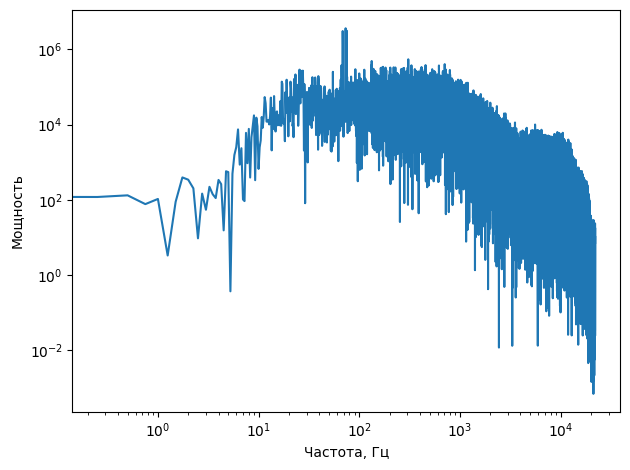

In [149]:
sea_spectrum.plot_power()
decorate(xlabel='Частота, Гц', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [150]:
sea_spectrum.estimate_slope().slope

-2.016762541969793

Эта запись напоминает красный шум ещё сильнее.

In [151]:
if not os.path.exists('wind.wav'):
    !wget https://github.com/Ch0rtik/telecom/raw/main/chap_04/wind.wav

wind_segment = read_wave('wind.wav').segment(start=1.0, duration=10.0)
wind_segment.make_audio()

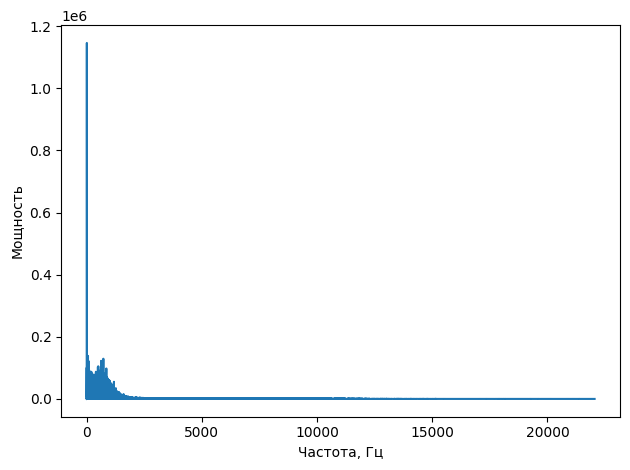

In [152]:
wind_spectrum = wind_segment.make_spectrum()
wind_spectrum.plot_power()
decorate(xlabel='Частота, Гц', ylabel='Мощность')

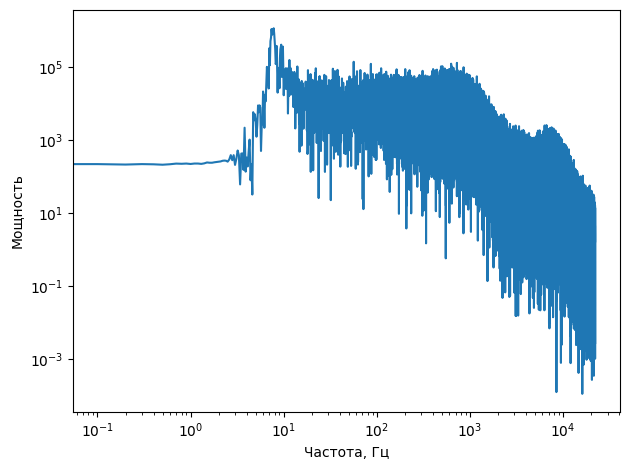

In [153]:
wind_spectrum.plot_power()
decorate(xlabel='Частота, Гц', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [154]:
wind_spectrum.estimate_slope().slope

-1.9764870417769007

А вот эта уже гораздо больше похожа на розовый шум

# Упражнение 4.2

В шумовом сигнале частотный состав меняется во времени. На большом интервале мощность на всех частотах одинакова, а на коротком мощность на каждой частоте случайна.

Для оценки долговременной средней мощности на каждой частоте можно разорвать сигнал на сегменты, вычислить спектр мощности для каждого сегмента, а затем найти среднее по сегментам.

Реализуйте метод Бартлетта и используйте его для оценки спектра мощности шумового сигнала. Подсказка: посмотрите на реализацию make_spectrogram.

In [155]:
from thinkdsp import Spectrum
import numpy as np

def bartlett(wave, seg_length=512, win_flag=True):
    spectrum = wave.make_spectrogram(seg_length, win_flag)
    segments = spectrum.spec_map.values()

    power_segments = []
    for segment in segments:
        power_segments.append(segment.power)

    hs = np.sqrt(sum(power_segments)/len(power_segments))
    fs = next(iter(segments)).fs

    spectrum = Spectrum(hs, fs, wave.framerate)
    return spectrum

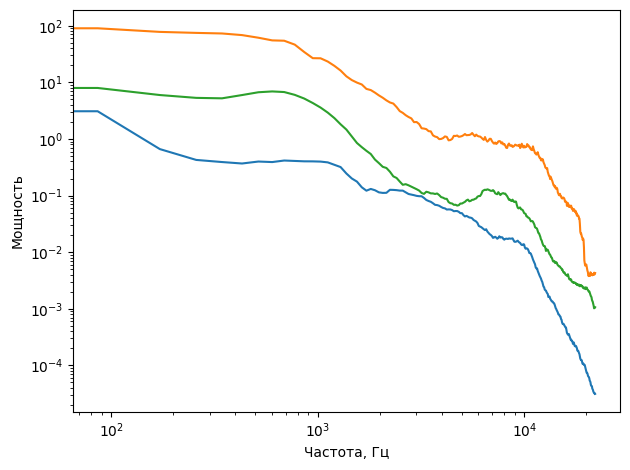

In [156]:
rain = bartlett(rain_segment)

sea = bartlett(sea_segment)

wind = bartlett(wind_segment)

rain.plot_power()
sea.plot_power()
wind.plot_power()
decorate(xlabel='Частота, Гц', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [157]:
rain.estimate_slope().slope


-2.5265192799661453

In [158]:
sea.estimate_slope().slope

-2.150089098945313

In [159]:
wind.estimate_slope().slope

-2.0845084913836813

С такой оценкой все звуки начали напоминать броуновский шум гораздо сильнее.

# Упражнение 4.3

На веб-странице http://www.coindesk.com/price можно скачать в ввиде CSV-файла исторические данные о ежедневной цене BitCoin. Откройте этот файл и вычислите спектр цен BitCoin как функцию времени. Похоже ли это на белый, розовый или броуновский шум?

In [160]:
import pandas as pd

if not os.path.exists('BTC-USD.csv'):
    !wget https://github.com/Ch0rtik/telecom/raw/main/chap_04/BTC-USD.csv

data = pd.read_csv('BTC-USD.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3521,2024-05-08,62332.640625,62986.085938,60877.128906,61187.941406,61187.941406,26088172222
3522,2024-05-09,61191.199219,63404.914063,60648.074219,63049.960938,63049.960938,25453338161
3523,2024-05-10,63055.191406,63446.742188,60208.781250,60792.777344,60792.777344,27804954694
3524,2024-05-11,60793.355469,61451.152344,60492.625000,60793.710938,60793.710938,13842272968


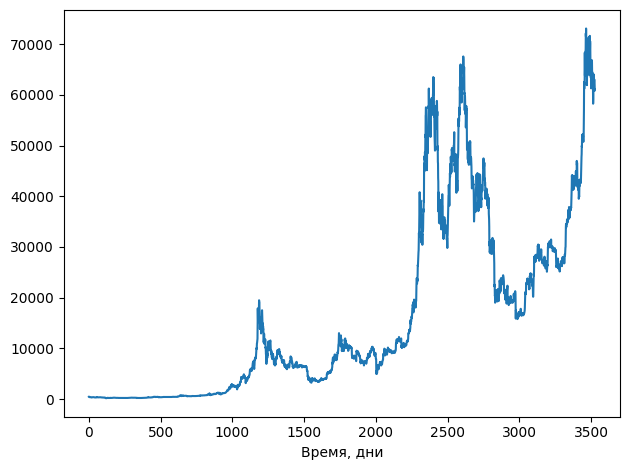

In [161]:
from thinkdsp import Wave

btc_wave = Wave(data['Close'], data.index, framerate = 1)
btc_wave.plot()
decorate(xlabel='Время, дни')

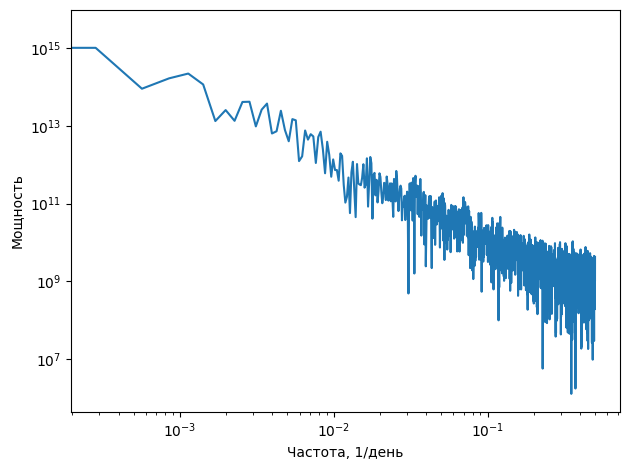

In [162]:
btc_spectrum = btc_wave.make_spectrum()
btc_spectrum.plot_power()
decorate(xlabel='Частота, 1/день', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [163]:
btc_spectrum.estimate_slope().slope

-1.8123301201410484

Сигнал оказался очень похож на броуновский шум.

# Упражнение 4.4

Счетчик Гейгера - прибор для обнаружения радиации. Когда ионизирующи частицы попадают в детектор, на его выходе появляются импульсы тока. Общий выход в определенный момент времени можно смоделировать некоррелированным пуассоновым шумом (UP), где каждая выборка есть случайное число из распределения Пуассона, соответствующее количеству частиц, обнаруженных за интервал измерения.

Напишите класс, называемый UncorrelatedPoissonNoise, наследующий thinkdsp._Noise и предоставляющий evaluate. Следует использовать Np.random.poisson для генерации случайный величин из распределения Пуассона. Параметр этой функции lam - это среднее число частиц за время каждого интервала. Можно использовать атрибут amp для определения lam. Например, при чатоте кадров 10 кГц и amp 0,001 получится около 10 "щелчков" в секунду.

Сгенерируйте пару секунд UP и прослушайте. Для малых значений amp, например 0,001, звук будет как у счетчика Гейгера. При больших значениях он будет похож на белый шум. Вычислите и напечатайте спектр мощности и посмотрите, так ли это.

In [164]:
from thinkdsp import Noise

class UncorrelatedPoissonNoise(Noise):

    def evaluate(self, ts):
        ys = np.random.poisson(self.amp, len(ts))
        return ys

In [165]:
geiger_signal = UncorrelatedPoissonNoise(amp=0.001)
geiger_wave = geiger_signal.make_wave(duration=2.0, framerate=10000)
white_noise_signal = UncorrelatedPoissonNoise(amp=1)
white_noise_wave = white_noise_signal.make_wave(duration=2.0, framerate=10000)

In [166]:
geiger_wave.make_audio()

Сигнал с малой амплитудой действительно напоминает счётчик Гейгера.

In [167]:
white_noise_wave.make_audio()

...а с большой амплитудой – белй шум.

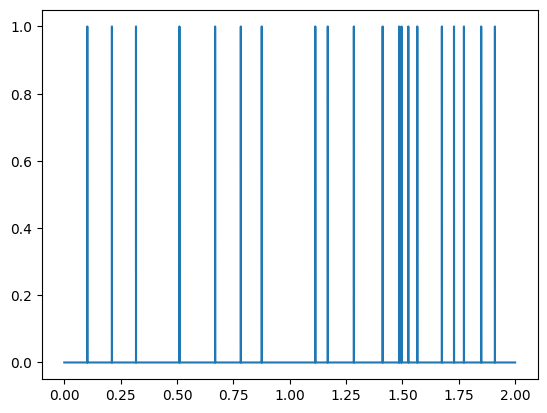

In [168]:
geiger_wave.plot()

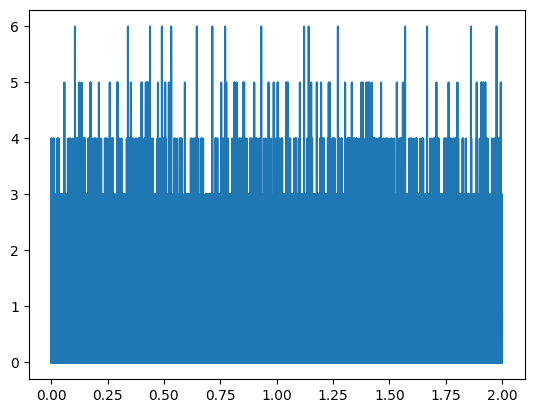

In [169]:
white_noise_wave.plot()

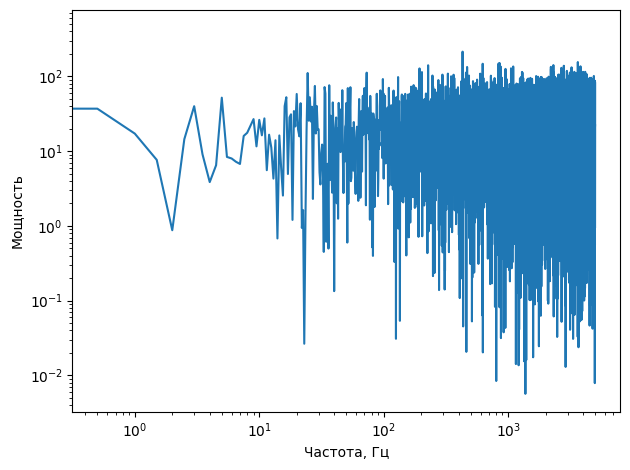

In [170]:
geiger_spectrum = geiger_wave.make_spectrum()
geiger_spectrum.plot_power()
decorate(xlabel='Частота, Гц', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [171]:
geiger_spectrum.estimate_slope().slope

-0.0014108761548462345

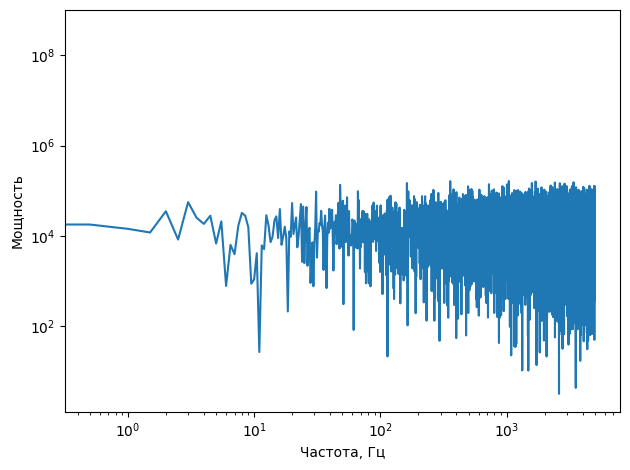

In [172]:
white_noise_spectrum = white_noise_wave.make_spectrum()
white_noise_spectrum.plot_power()
decorate(xlabel='Частота, Гц', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [173]:
white_noise_spectrum.estimate_slope().slope

-0.014038770070653185

При этом оба сигнала имеют уклон, соответствующий белому шуму.

# Упражнение 4.5

В этой главе алгоритм для генерации розового шума концептуально простой, но затратный. Существет более эффективные варианты, например алгоритм Voss-McCartney. Изучите этот способ, реализуйте его, вычислите спектр результата и убедитесь, что соотношения между мощностью и частотой соответсвующие.

In [174]:
def voss_mccartney(rows, columns=16):
    array = np.empty((rows, columns))
    array.fill(np.nan)
    array[0, :] = np.random.random(columns)
    array[:, 0] = np.random.random(rows)

    cols = np.random.geometric(0.5, rows)
    cols[cols >= columns] = 0
    new_rows = np.random.randint(rows, size=rows)
    array[new_rows, cols] = np.random.random(rows)

    data = pd.DataFrame(array)
    data.fillna(method='ffill', axis=0, inplace=True)
    total = data.sum(axis=1)

    return total.values

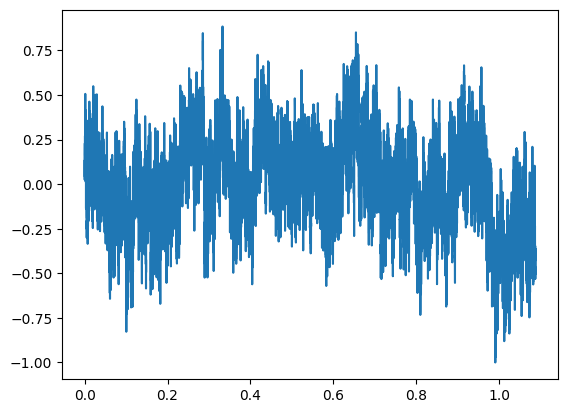

In [175]:
ys = voss_mccartney(12000)
wave = Wave(ys)
wave.unbias()
wave.normalize()
wave.plot()

In [176]:
wave.make_audio()

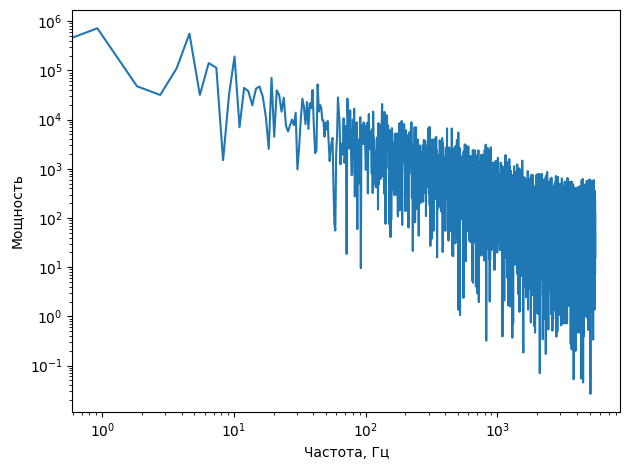

In [177]:
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0
spectrum.plot_power()
decorate(xlabel='Частота, Гц', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [178]:
spectrum.estimate_slope().slope

-0.9997152975795411

Уклон результата оказался близок к -1, а значит метод действительно генерирует розовый шум.